In [1]:
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.style.use('seaborn-white')

In [3]:
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [4]:
contour_thres = np.load('/Users/linggeli/monte_carlo/data/penalty_normal_contour_thres_68.npy')

In [5]:
print(contour_thres.shape)

(20, 20)


//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


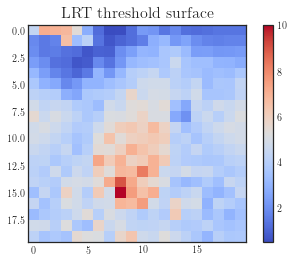

In [6]:
im = plt.imshow(contour_thres, cmap='coolwarm', interpolation='nearest')
plt.colorbar(im)
plt.title('LRT threshold surface', fontsize=16)
plt.show()

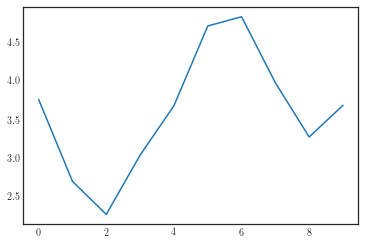

In [7]:
plt.plot(contour_thres[5, ::2])

In [8]:
from scipy.stats import gaussian_kde
from helper import load_dist

In [9]:
file_pattern = '/Users/linggeli/monte_carlo/data/penalty_normal/contour_normal'
stuff = load_dist(file_pattern, [(5, 0), (5, 4), (5, 8), 
                                 (5, 12), (5, 16)])

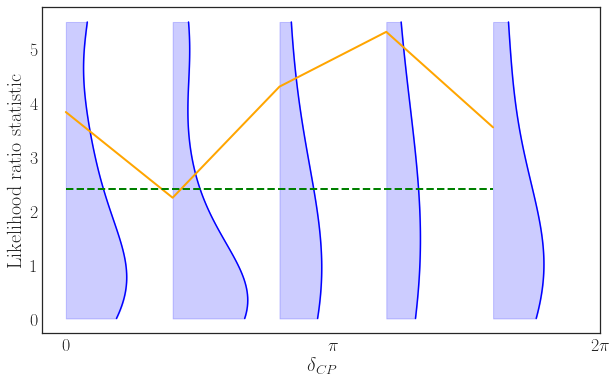

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
thres = np.zeros(5)
dens = np.zeros(5)
for i in range(5):
    lrt = stuff[i][:500]
    density = gaussian_kde(lrt)
    xs = np.linspace(0, 5.5, 100)
    density._compute_covariance()
    thres[i] = np.percentile(lrt, 69)
    dens[i] = density(thres[i])
    plt.plot(density(xs) * 3 + i , xs, color='blue')
    ax.fill_betweenx(xs, np.repeat(i, xs.shape[0]), density(xs) * 3 + i, alpha=0.2, color='blue')
plt.plot(np.arange(5), thres, color='orange', lw=2)
plt.plot(np.arange(5), np.repeat(2.4, 5), color='green', lw=2, ls='dashed')
plt.xticks([0, 2.5, 5], [r'$0$', r'$\pi$', r'$2\pi$'], fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel(r'$\delta_{CP}$', fontsize=20)
plt.ylabel('Likelihood ratio statistic', fontsize=20)
plt.savefig('threshold.png')
plt.show()

In [11]:
data = np.loadtxt('/Users/linggeli/Downloads/data.txt', delimiter=',')
mc1 = np.loadtxt('/Users/linggeli/Downloads/mc1.txt', delimiter=',')
mc2 = np.loadtxt('/Users/linggeli/Downloads/mc2.txt', delimiter=',')

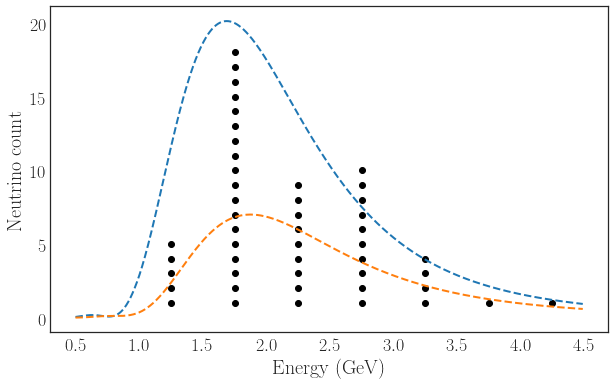

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(mc1[:, 0], mc1[:, 1], lw=2, ls='dashed')
k = 1
#k = np.sum(mc1[:, 1]) / np.sum(mc2[:, 1])
plt.plot(mc2[:, 0], mc2[:, 1] * k, lw=2, ls='dashed')
dot = []
for i in range(data.shape[0]):
    n = int(data[i, 1])
    current = np.zeros((n, 2))
    current[:, 0] = data[i, 0]
    current[:, 1] = np.arange(n) + 1
    dot.append(current)
dot = np.concatenate(dot)
plt.scatter(dot[:, 0], dot[:, 1], c='black')
plt.yticks([0, 5, 10, 15, 20], [0, 5, 10, 15, 20], fontsize=18)
plt.xticks(fontsize=18)
plt.xlabel('Energy (GeV)', fontsize=20)
plt.ylabel('Neutrino count', fontsize=20)
plt.savefig('data.png')
plt.show()